In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import scipy.stats as stats
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
df = pd.read_csv('C:/Users/keith/Desktop/Thinkful/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_201313tbl8ny.csv',encoding = "ISO-8859-1")

pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows

df.head(5)

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0


In [3]:
df = df.loc[3:,:]
df

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,36,0,NaN
10,Allegany Village,"1,781",3,0,NaN,0,0,3,10,0,10,0,0
11,Amherst Town,"118,296",107,1,NaN,7,31,68,"2,118",204,"1,882",32,3
12,Amityville Village,"9,519",9,0,NaN,2,4,3,210,16,188,6,1


In [4]:
df = df.loc[:,['Table 8','Unnamed: 1','Unnamed: 3','Unnamed: 6', 'Unnamed: 8','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 7' ]]
df.columns = ['City','Population','Murder','Robbery','Property_crime','Theft','MV','Arson','Asslt' ]

In [5]:
df = df.loc[4:351,:]

In [6]:
df['Population'] = df['Population'].str.replace(',','')
df['Population'] = df['Population'].astype(int)

In [7]:
df['Population^2'] = df.Population*df.Population 

In [8]:
df = df.drop(df.index[216]) # dropping New York as an outlier
df.index = pd.RangeIndex(len(df.index))
df.index = range(len(df.index))

In [9]:
# convert columns from string to int 
 
cols = ['Property_crime','Murder','Robbery','Theft','MV','Arson','Asslt']
df = df.dropna(how='any', inplace=False)
 
df[cols] = df[cols].replace({ ',': ''}, regex=True)
df[cols] = df[cols].astype(int, regex=True)

In [10]:
# convert 'Murder' and 'Robbery' to binary
df.loc[df['Murder'] > 0, 'Murder'] = 1
df.loc[df['Murder'] <= 0, 'Murder'] = 0
df.loc[df['Robbery'] > 0, 'Robbery'] = 1
df.loc[df['Robbery'] <= 0, 'Robbery'] = 0



In [11]:
df.index = pd.RangeIndex(len(df.index))
df.index = range(len(df.index))
df = df.dropna(how='any', inplace=False)
df = df[['Property_crime','City' ,'Population^2','Population','Murder','Robbery','Theft','MV','Arson','Asslt']]
 

In [12]:
df['Population_log'] = [ math.sqrt(x) for x in  df['Population']] 

,Property_crime,Population^2,Population,Murder,Robbery,Theft,MV,Arson,Asslt,Population_log
Property_crime,1.000,0.184,0.869,0.503,0.307,0.996,0.958,0.921,0.920,0.765
Population^2,0.184,1.000,0.334,0.095,0.256,0.233,0.101,0.125,0.036,0.406
Population,0.869,0.334,1.000,0.559,0.387,0.883,0.851,0.702,0.850,0.928
Murder,0.503,0.095,0.559,1.000,0.354,0.506,0.472,0.368,0.521,0.584
Robbery,0.307,0.256,0.387,0.354,1.000,0.333,0.226,0.166,0.224,0.557
Theft,0.996,0.233,0.883,0.506,0.333,1.000,0.933,0.894,0.893,0.792
MV,0.958,0.101,0.851,0.472,0.226,0.933,1.000,0.935,0.971,0.697
Arson,0.921,0.125,0.702,0.368,0.166,0.894,0.935,1.000,0.888,0.548
Asslt,0.920,0.036,0.850,0.521,0.224,0.893,0.971,0.888,1.000,0.693
Population_log,0.765,0.406,0.928,0.584,0.557,0.792,0.697,0.548,0.693,1.000


<function matplotlib.pyplot.show(*args, **kw)>

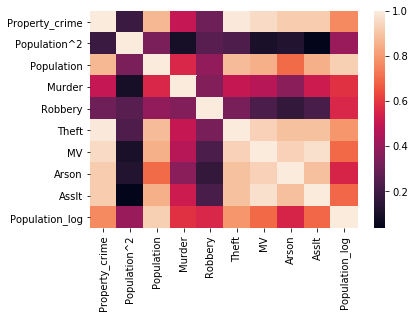

In [13]:
correlation_matrix = df.corr()
display(correlation_matrix)
sns.heatmap(df.corr())
plt.show

In [29]:
 # Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property_crime'].values.reshape(-1, 1)
X = df[['Population','Murder','Robbery','Arson']]
regr.fit(X,Y)
 
 
 
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
 


Coefficients: 
 [[1.40834229e-02 1.18657424e+02 7.11943964e+01 5.61044416e+01]]

Intercept: 
 [-22.54983445]

R-squared:
0.9486113691674124


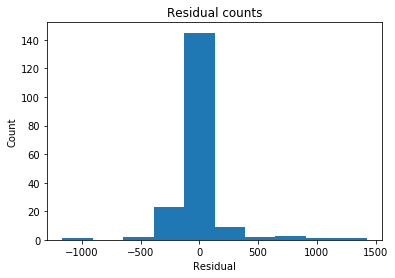

In [30]:
# Extract predicted values.
sqrroot_outcome = [math.sqrt(x) for x in  df.Property_crime]

predicted = regr.predict(X).ravel()
actual = df.Property_crime
# Calculate the error 
residual = actual - predicted

 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

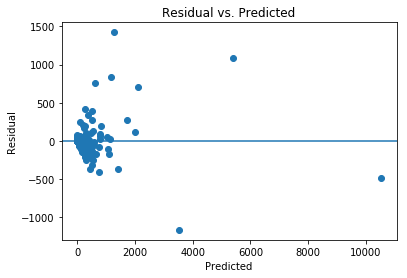

In [31]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [32]:
 np.mean((predicted-actual)**2) 

47616.45448053798